In [394]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
import seaborn as sns


In [395]:
df = pd.read_csv('community_participation_records.csv')
df.describe()

,Mean,Median,Range,q1,q2,q3,Std
count,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000
mean,0.049158,0.025857,0.494135,0.013124,0.025857,0.050073,0.092059
std,0.115018,0.128849,0.494518,0.082848,0.128849,0.178186,0.112301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012066,0.000396,0.450000,0.000301,0.000396,0.000870,0.099034
75%,0.050346,0.006211,0.995918,0.004667,0.006211,0.014427,0.152308
max,1.000000,1.000000,0.999870,1.000000,1.000000,1.000000,0.498810


In [396]:
df.groupby('ecosystem').describe()

Mean                                                          
            count      mean       std  min       25%       50%       75%   
ecosystem                                                                  
maven      1000.0  0.009432  0.046298  0.0  0.000000  0.000000  0.000000  \
npm         986.0  0.020336  0.052539  0.0  0.000000  0.000000  0.016380   
pypi        828.0  0.077455  0.135273  0.0  0.000000  0.044225  0.075133   
rubygems    872.0  0.100439  0.163916  0.0  0.015682  0.038275  0.105714   

                     Median            ...        q3          Std             
                max   count      mean  ...       75%  max   count      mean   
ecosystem                              ...                                    
maven      1.000000  1000.0  0.003414  ...  0.000000  1.0  1000.0  0.023486  \
npm        0.666667   986.0  0.006052  ...  0.002120  1.0   986.0  0.050755   
pypi       1.000000   828.0  0.042534  ...  0.057731  1.0   828.0  0.137101   
rubygems   1.000000   872.0  0.058155  ...  0.048880  1.0   872.0  0.174633   

                                                                  
                std  min       25%       50%       75%       max  
ecosystem                                                         
maven      0.064235  0.0  0.000000  0.000000  0.000000  0.498201  
npm        0.092864  0.0  0.000000  0.000000  0.100753  0.490566  
pypi       0.117700  0.0  0.000000  0.137284  0.199722  0.498529  
rubygems   0.098150  0.0  0.101802  0.135333  0.224769  0.498810  

[4 rows x 56 columns]

In [397]:
df['IQR'] = df['q3'] - df['q1']
filtered_df = df[df['IQR'] > 0]
print(filtered_df.describe())
filtered_df = filtered_df.loc[:, ['ecosystem', 'Mean', 'Median', 'Range', 'IQR', 'q1', 'q2', 'q3', 'Std']]
filtered_df

              Mean       Median        Range           q1           q2   
count  1740.000000  1740.000000  1740.000000  1740.000000  1740.000000  \
mean      0.086386     0.040623     0.987934     0.013649     0.040623   
std       0.108689     0.147085     0.033927     0.037563     0.147085   
min       0.010445     0.000130     0.400000     0.000130     0.000130   
25%       0.022110     0.001750     0.989474     0.001280     0.001750   
50%       0.048989     0.005814     0.996124     0.004370     0.005814   
75%       0.098626     0.019578     0.998856     0.010870     0.019578   
max       0.800000     1.000000     0.999870     0.600000     1.000000   

                q3          Std          IQR  
count  1740.000000  1740.000000  1740.000000  
mean      0.091922     0.182858     0.078273  
std       0.225450     0.091227     0.207792  
min       0.000359     0.099126     0.000179  
25%       0.003952     0.108627     0.002272  
50%       0.014467     0.148038     0.009303  
75% 

,ecosystem,Mean,Median,Range,IQR,q1,q2,q3,Std
0,npm,0.029992,0.005525,0.994475,0.005525,0.005525,0.005525,0.011050,0.133477
4,npm,0.032929,0.005917,0.997041,0.005917,0.002959,0.005917,0.008876,0.125669
6,npm,0.022687,0.003846,0.996154,0.003846,0.003846,0.003846,0.007692,0.112433
7,npm,0.025217,0.004831,0.997585,0.004831,0.004831,0.004831,0.009662,0.107584
9,npm,0.014196,0.000567,0.999716,0.000567,0.000284,0.000567,0.000851,0.103877
...,...,...,...,...,...,...,...,...,...
2826,maven,0.019461,0.002309,0.999230,0.002309,0.001540,0.002309,0.003849,0.107613
2827,maven,0.082564,0.004444,0.997778,0.002222,0.002222,0.004444,0.004444,0.264921
2828,maven,0.019216,0.003268,0.996732,0.006536,0.003268,0.003268,0.009804,0.099829
2830,maven,0.043516,0.010989,0.989011,0.010989,0.010989,0.010989,0.021978,0.140212


In [398]:
filtered_df.groupby('ecosystem').describe()

Mean                                                               
           count      mean       std       min       25%       50%       75%   
ecosystem                                                                      
maven      139.0  0.059481  0.072734  0.010874  0.022017  0.034497  0.061130  \
npm        222.0  0.074198  0.081718  0.010445  0.024242  0.042077  0.098768   
pypi       561.0  0.099599  0.114816  0.010452  0.038284  0.063710  0.102121   
rubygems   818.0  0.085203  0.114561  0.011212  0.015682  0.037443  0.104433   

                    Median            ...        q3         Std             
                max  count      mean  ...       75%  max  count      mean   
ecosystem                             ...                                   
maven      0.501799  139.0  0.017236  ...  0.018498  1.0  139.0  0.164172  \
npm        0.666667  222.0  0.023766  ...  0.044203  1.0  222.0  0.179692   
pypi       0.700000  561.0  0.049983  ...  0.057731  1.0  561.0  0.195723   
rubygems   0.800000  818.0  0.042752  ...  0.048387  1.0  818.0  0.178070   

                                                                       
                std       min       25%       50%       75%       max  
ecosystem                                                              
maven      0.076551  0.099339  0.113385  0.137167  0.173822  0.498201  
npm        0.082916  0.099126  0.108721  0.155014  0.226710  0.490566  
pypi       0.091038  0.099268  0.135261  0.161572  0.238374  0.498529  
rubygems   0.094791  0.099145  0.101802  0.138258  0.225076  0.498810  

[4 rows x 64 columns]

In [399]:
averages = filtered_df.groupby('ecosystem').median()
print(averages)

               Mean    Median     Range       IQR        q1        q2   
ecosystem                                                               
maven      0.034497  0.002503  0.998561  0.004646  0.001754  0.002503  \
npm        0.042077  0.006154  0.995643  0.008588  0.004843  0.006154   
pypi       0.063710  0.008209  0.994478  0.016949  0.006757  0.008209   
rubygems   0.037443  0.005102  0.996782  0.007238  0.003738  0.005102   

                 q3       Std  
ecosystem                      
maven      0.006258  0.137167  
npm        0.014520  0.155014  
pypi       0.025000  0.161572  
rubygems   0.011631  0.138258  


In [400]:
filtered_df.groupby('ecosystem').describe()

Mean                                                               
           count      mean       std       min       25%       50%       75%   
ecosystem                                                                      
maven      139.0  0.059481  0.072734  0.010874  0.022017  0.034497  0.061130  \
npm        222.0  0.074198  0.081718  0.010445  0.024242  0.042077  0.098768   
pypi       561.0  0.099599  0.114816  0.010452  0.038284  0.063710  0.102121   
rubygems   818.0  0.085203  0.114561  0.011212  0.015682  0.037443  0.104433   

                    Median            ...        q3         Std             
                max  count      mean  ...       75%  max  count      mean   
ecosystem                             ...                                   
maven      0.501799  139.0  0.017236  ...  0.018498  1.0  139.0  0.164172  \
npm        0.666667  222.0  0.023766  ...  0.044203  1.0  222.0  0.179692   
pypi       0.700000  561.0  0.049983  ...  0.057731  1.0  561.0  0.195723   
rubygems   0.800000  818.0  0.042752  ...  0.048387  1.0  818.0  0.178070   

                                                                       
                std       min       25%       50%       75%       max  
ecosystem                                                              
maven      0.076551  0.099339  0.113385  0.137167  0.173822  0.498201  
npm        0.082916  0.099126  0.108721  0.155014  0.226710  0.490566  
pypi       0.091038  0.099268  0.135261  0.161572  0.238374  0.498529  
rubygems   0.094791  0.099145  0.101802  0.138258  0.225076  0.498810  

[4 rows x 64 columns]

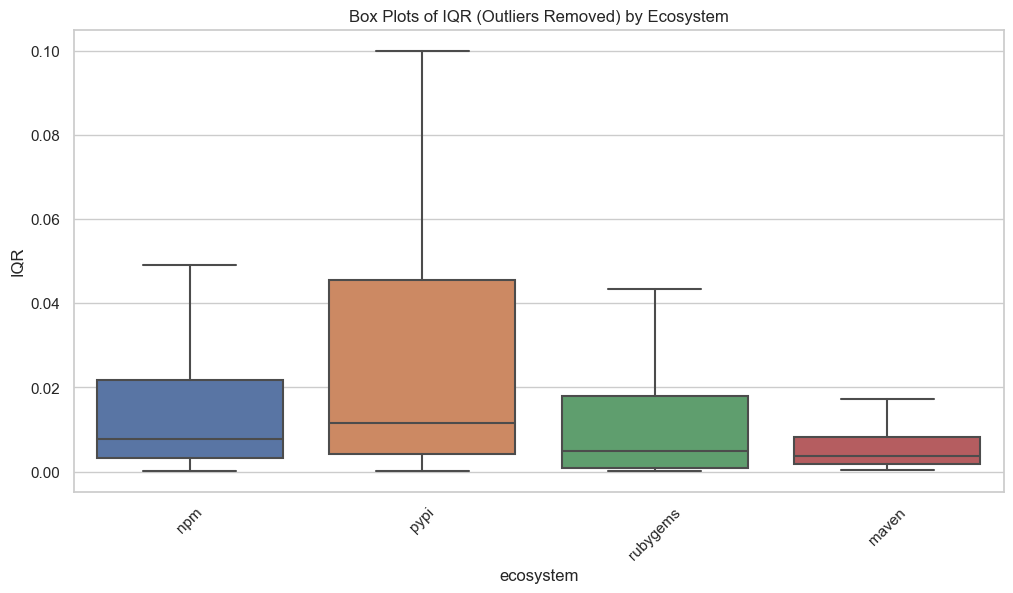

   Category        Q1        Q2        Q3       Min       Max
0       npm  0.003173  0.007796  0.021860  0.000198  0.102564
1      pypi  0.004061  0.011628  0.045455  0.000179  0.100000
2  rubygems  0.000936  0.004950  0.018043  0.000234  0.101449
3     maven  0.001714  0.003721  0.008250  0.000393  0.051873


In [401]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

scaler = MaxAbsScaler()
filtered_df["Normalised_IQR"] = scaler.fit_transform(filtered_df[["IQR"]])

df_cleaned = remove_outliers_iqr(filtered_df, "Normalised_IQR")

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x="ecosystem", y="IQR", data=df_cleaned, showfliers=False)
plt.xticks(rotation=45) 
plt.title("Box Plots of IQR (Outliers Removed) by Ecosystem")
plt.show()

summary_data = []
for category in df_cleaned['ecosystem'].unique():
    subset = df_cleaned[df_cleaned['ecosystem'] == category]
    Q1 = subset["IQR"].quantile(0.25)
    Q2 = subset["IQR"].median()
    Q3 = subset["IQR"].quantile(0.75)
    min_value = subset["IQR"].min()
    max_value = subset["IQR"].max()
    
    summary_data.append({
        'Category': category,
        'Q1': Q1,
        'Q2': Q2,
        'Q3': Q3,
        'Min': min_value,
        'Max': max_value
    })

# Create a Pandas DataFrame from the summary data
summary_df = pd.DataFrame(summary_data)

# Display the summary table
print(summary_df)


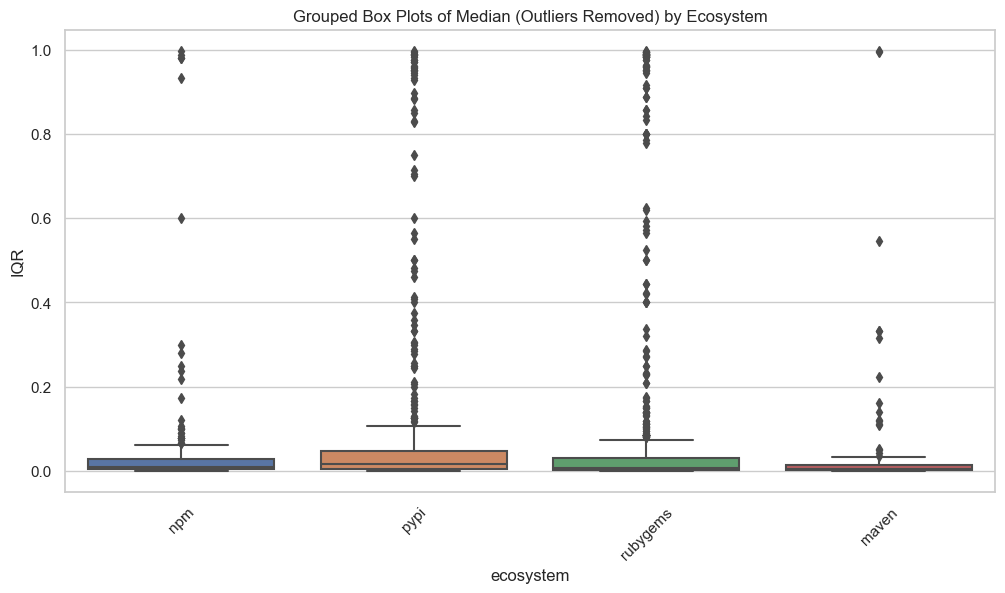

In [402]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="ecosystem", y="IQR", data=filtered_df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Grouped Box Plots of Median (Outliers Removed) by Ecosystem")
plt.show()

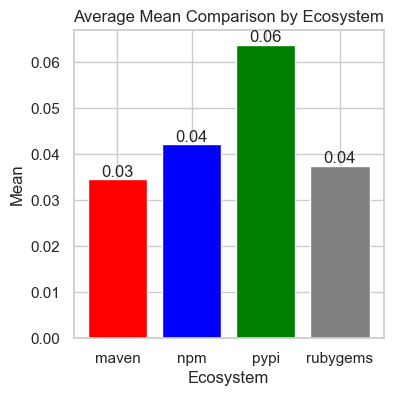

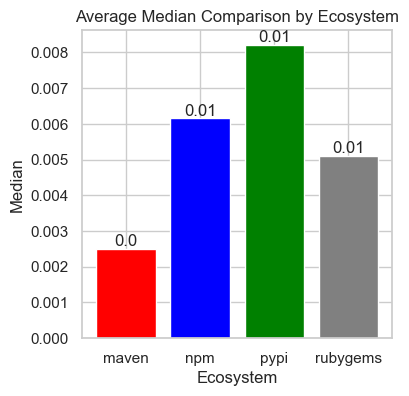

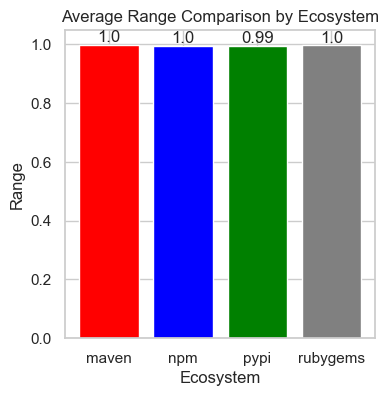

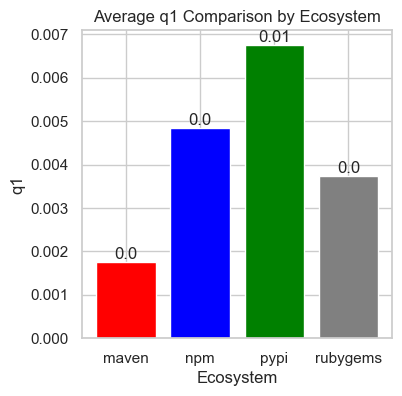

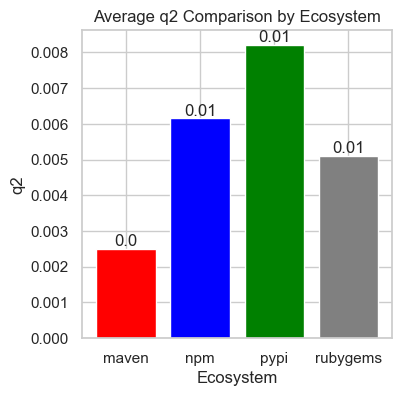

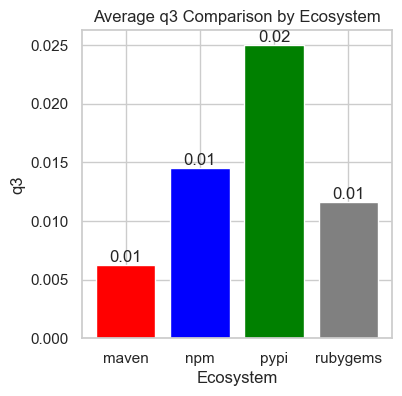

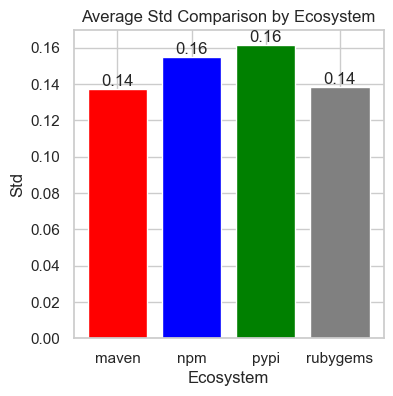

In [403]:
metrics = ['Mean', 'Median', 'Range', 'q1', 'q2', 'q3', 'Std']

for metric in metrics:
    plt.figure(figsize=(4, 4) ) 
    bars = plt.bar(averages.index, averages[metric], color=['red', 'blue', 'green', 'gray'])
    plt.xlabel('Ecosystem')
    plt.ylabel(metric)
    plt.title(f'Average {metric} Comparison by Ecosystem')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

    plt.show()